# Assessed Solutions 6


## Q1) Estimate probability from frequency [1 mark]

Roll 1 million pairs of dice and calculate the probability of getting two sixes from the rolled results. How does this compare the the true value? [1 mark]

In [19]:
import numpy as np;
import time;

seed = time.time_ns();
rng = np.random.default_rng(seed);
numberOfPairs = 1000000;

dicePairs = rng.integers(6, size = (numberOfPairs, 2)) + 1;

dualSixesCount = 0;

for pair in dicePairs:
    if (pair[0] == 6 & pair[1] == 6):
        dualSixesCount += 1;
    
experimentalProbabilityOfDualSixes = dualSixesCount / numberOfPairs;

print(f"The experimental probablity of getting 2 sixes from {numberOfPairs} pairs of d6s is {experimentalProbabilityOfDualSixes}");
print(f"The true value of the probability is {1/36.0}");

The experimental probablity of getting 2 sixes from 1000000 pairs of d6s is 0.027724
The true value of the probability is 0.027777777777777776


## Q2) Histogram of outcomes to estimate distribution [2 marks]


Some probabilities are more difficult to calculate analytically. A good example of this is rolling stats for Tabletop Role Playing Games where often you roll four six-sided dice and then remove the lowest one.

* Write a programme that calculates the probability distribution of the results from these dice rolls [1 mark].

* Plot the results using a histogram with sensibly chosen bins, range of x-values and axis labels to show the relative probabilities. (Using plt.hist weights may be useful here to ensure everything adds up to one). [1 mark]

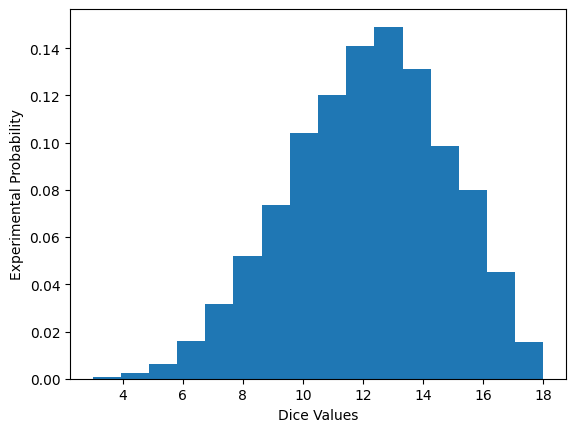

In [101]:
from matplotlib import pyplot as mpl;
import numpy as np;
import time;

seed = time.time_ns();
rng = np.random.default_rng(seed);
numberOfRolls = 10000;
numberOfDice = 4;

diceRollsCount = [];

for i in range(1, numberOfRolls + 1):
    diceRolls = (rng.integers(6, size = numberOfDice) + 1).tolist();
    diceRolls.remove(min(diceRolls));
    diceRollsSum = sum(diceRolls);
    diceRollsCount.append(diceRollsSum);

mpl.hist(diceRollsCount, bins = 16, density = True, range = (3,18));
mpl.xlabel("Dice Values");
mpl.ylabel("Experimental Probability");

mpl.show();

## Q3) 1D Random walk [3 marks]

A random walk is very useful in maths and physics. You take a walk along a 1D plane for N steps. You have a given probability to go either forward so x=x+1, or backwards so x=x-1. Here the probabilities are equal (0.5).

* Write a programme to simulate a random walk for $N=10,000$ steps. [1 mark]

Then show the following:

* Show a plot of the x-position as a function of time (or step number). [1 mark]

* Show a plot of the mean displacement (x-position) for a given step as a function of time (or step number). [1 mark]

In [107]:
# First part

import numpy as np;
import time;

seed = time.time_ns();
rng = np.random.default_rng(seed);
N = 10000;

walkPosition = 0;

for i in range(1, N + 1):
    walkPosition += rng.choice([-1, 1]);

print(walkPosition);

-50


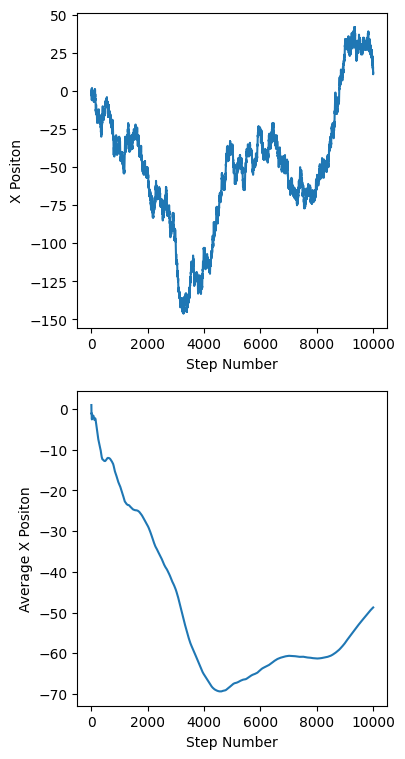

In [109]:
# Second part

from matplotlib import pyplot as mpl;
import numpy as np;
import time;

seed = time.time_ns();
rng = np.random.default_rng(seed);
N = 10000;

walkPosition = 0;
walkPositions = [];
averageWalkPositions = [];

for i in range(1, N + 1):
    walkPosition += rng.choice([-1, 1]);
    walkPositions.append(walkPosition);
    averageWalkPositions.append(sum(walkPositions) / len(walkPositions));

fig, axes = mpl.subplots(nrows = 2, ncols = 1, figsize = (4, 9))

ax = axes[0];
ax.plot(np.linspace(1, N, N), walkPositions)
ax.set_xlabel("Step Number");
ax.set_ylabel("X Positon");

ax = axes[1];
ax.plot(np.linspace(1, N, N), averageWalkPositions)
ax.set_xlabel("Step Number");
ax.set_ylabel("Average X Positon");